## `Encoding Category Features`

-----------------------------------

### Method

- After I imported the dataset I seperated the features (X) from the target variable column (y). 

- I used the label encoder to encode the target (y).

- I then implemented the different encoders for each given task & split the data between train and test.

- I used `Categorical Naive Bayes` and `Bernoulli Naive Bayes` provided by scikit-learn to perform predictions on the dataset and finally test the accuracy of those predictions by comparing them back to the target y test split.



------------------------------------------------------------------

#### Import the required modules

In [1]:
# imports required for the tasks, Naive Bayes libraries and the Encoder libraries
import pandas as pd
import numpy as np
from sklearn.naive_bayes import CategoricalNB, BernoulliNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

## Task 1
 - In the first section I encode the data set using `OrdinalEncoder` and use `CategoricalNB`.
 - For the second part of the task I use `OneHotEncoder` & `BernoulliNB` to run prediction on the dataset.

#### Load 'breast-cancer.csv' Dataset

In [2]:
# Load data from the breast-cancer.csv file

data = pd.read_csv('breast-cancer.csv')
data # Print data table

rand = 29; # int to change random_state when splitting the datasets for testing purposes

In [3]:
# Seperate data features from the target variable

X = data
y = X.pop('Class').values

print(data.columns)

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat'],
      dtype='object')


In [4]:
# LabelEncode the target variable y: Class

lab_encoder = LabelEncoder()
y = lab_encoder.fit_transform(y)
print(y.shape)
y

(286,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Ordinal Encoding


In [5]:
# Implement SciKit Ordinal Encoder

ord_encoder = OrdinalEncoder(categories = 'auto')
dataOE = ord_encoder.fit_transform(X)
dataOE

array([[1., 2., 5., ..., 0., 2., 0.],
       [2., 2., 3., ..., 1., 5., 0.],
       [2., 2., 3., ..., 0., 2., 0.],
       ...,
       [4., 0., 3., ..., 1., 3., 0.],
       [2., 0., 5., ..., 0., 2., 0.],
       [3., 0., 5., ..., 0., 2., 0.]])

In [6]:
# Split into train and test sets 50:50 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataOE, y, test_size=0.5, random_state=rand)

print(X_test.shape)
print(X_train.shape)


(143, 9)
(143, 9)


In [7]:
catNB = CategoricalNB(fit_prior=True,alpha = 0.0001)    
data_catNB = catNB.fit(X_train, y_train)

y_dash = data_catNB.predict(X_test)

In [8]:
# Check Accuracy using Ordinal encoding and Categorical Naive Bayes

accuracy = accuracy_score(y_test, y_dash)
print('Accuracy: %.2f' % (accuracy*100))

confusion = confusion_matrix(y_test, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Accuracy: 74.13
Confusion matrix:
[[83 17]
 [20 23]]


### One Hot Encoding

In [9]:
# transform breast-cancer dataset using OneHot encoding

onehot_encoder = OneHotEncoder()
dataOH = onehot_encoder.fit_transform(X)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dataOH, y, test_size=0.5, random_state=rand)

In [10]:
# Train data using Bernoulli 

bnb = BernoulliNB()
bnb_data = bnb.fit(X_train, y_train)

# Run bernoulli pred on X test data set
y_dash =bnb_data.predict(X_test)

In [11]:
# Check accuracy using One Hot encoding and Bernooulli Naive Bayes

accuracy = accuracy_score(y_test, y_dash)
print('Accuracy: %.2f' % (accuracy*100))
confusion = confusion_matrix(y_test, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Accuracy: 74.13
Confusion matrix:
[[82 18]
 [19 24]]


## Task 2
### Cat Boost Encoding

- For the second task I encode the data set using `CatBoostEncoder` and use `CategoricalNB` to run prediction tests.

In [12]:
import category_encoders as ce

# Define catboost encoder
cbe_encoder = ce.cat_boost.CatBoostEncoder()

# Fit the dataset to CatBoost 
dataCBE = cbe_encoder.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(dataCBE, y, test_size=0.5, random_state=rand)


In [13]:
# Create Categorical NB model and fit using the training data
catNB = CategoricalNB(fit_prior=True,alpha = 0.0001)    
catBoost_catNB = catNB.fit(X_train, y_train)
# Run NB prediction on Test set
y_dash = catBoost_catNB.predict(X_test)

In [14]:
# Test accuracy using SkLearn library

accuracy = accuracy_score(y_test, y_dash)
print('Accuracy: %.2f' % (accuracy*100))

confusion = confusion_matrix(y_test, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Accuracy: 72.73
Confusion matrix:
[[83 17]
 [22 21]]


## Task 3

- For this task I use the same three Encoders and Naive Bayes models above, I split the datasets to training and testing before fitting the encoders. The encoders are fitted using the training data only.

Firstly I created a 2D list of the category features to apply later on the encoders.

In [15]:
# Set the categories for X manually (features)
data_cat = [  ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'],
                ['lt40', 'ge40', 'premeno'],
                ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54'], # tumor-size
                ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '24-26'], # inv-nodes
                ['yes', 'no'], # node-caps
                ['1', '2', '3'], # deg-malig: maligency, Higher number indicates greater
                ['left', 'right'], # breast
                ['left_up', 'left_low', 'right_up', 'right_low', 'central'], # breast-quad
                ['yes', 'no']
             ]

### Ordinal Encoding

#### Design Decision: 
The `CategoricalNB` library does not handle unknown values. For the `OrdinalEncoder` I decided on the approach of temporarily removing any row that has unknown values or '?' inputted as a feature.

In [16]:
# Import Dataset & Set X and y Values
data = pd.read_csv('breast-cancer.csv')
# Replace "?" with NaN
data = data.replace('?', np.nan)

# Drop all rows with NaN values
data  = data.dropna()

X = data
y = X.pop('Class').values

In [17]:
# Split dataset 50:50 for Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rand)

In [18]:
# LabelEncode the y Target
lab_encoder = LabelEncoder()

y_train = lab_encoder.fit_transform(y_train)
y_test = lab_encoder.transform(y_test)

In [19]:
# Create new OrdinalEncoder(): fit with training data & manually set categories
ord_encoder2 = OrdinalEncoder(categories = data_cat)
ord_encoder2 = ord_encoder2.fit(X_train)


X_train = ord_encoder2.transform(X_train)
X_test = ord_encoder2.transform(X_test)

# ------------------

# --- Used for testing: To check Features listed in both Train and Test

# print(ord_encoder2.categories_)

# for i in range(X_train.shape[1]):
#     print(f"Feature {i}: {np.unique(X_train[:, i])}")
    
# for i in range(X_test.shape[1]):
#     print(f"Feature {i}: {np.unique(X_test[:, i])}")
    


#### Design Decision:

In order to have the same amount of category features for both test and train when running the CatNB, I manually set the minimum number of categories for each feature in order to avoid index out of bound issues arising.

- For example in the data set, inv-node contains one 24-26 sample, this will always lead to either the X_test set or the X_train set having one more category in this feature.

In [20]:
catNB = CategoricalNB(fit_prior=True,alpha = 0.0001, min_categories = [6,3,11,7,2,3,2,5,2]) 
data_catNB = catNB.fit(X_train, y_train)                                                   

y_dash = data_catNB.predict(X_test)

In [21]:
# Check Accuracy using Ordinal encoding and Categorical Naive Bayes

accuracy = accuracy_score(y_test, y_dash)
print('Accuracy: %.2f' % (accuracy*100))

confusion = confusion_matrix(y_test, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Accuracy: 71.22
Confusion matrix:
[[77 15]
 [25 22]]


### OneHot Encoding

In [22]:
# Import Dataset & Set X and y Values

data = pd.read_csv('breast-cancer.csv')
X = data.drop('Class', axis=1)
y = data['Class']

# Split dataset 50:50 for Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rand)

In [23]:
# OneHot encode X_train and X_test

onehot_encoder = OneHotEncoder(handle_unknown='ignore')
X_train = onehot_encoder.fit_transform(X_train)
X_test = onehot_encoder.transform(X_test)

In [24]:
# Fit The training data to Naive Bayes Model.

bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Run bernoulli prediction on X test data set
y_dash = bnb.predict(X_test)

In [25]:
# Check the accuracy

accuracy = accuracy_score(y_test, y_dash)
print('Accuracy: %.2f' % (accuracy*100))
confusion = confusion_matrix(y_test, y_dash)
print("Confusion matrix:\n{}".format(confusion))

Accuracy: 74.13
Confusion matrix:
[[82 18]
 [19 24]]


### Cat Boost Encoding

In [26]:
# Import Dataset & Set X and y Values

data = pd.read_csv('breast-cancer.csv')
X = data.drop('Class', axis=1)
y = data['Class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rand)

In [28]:
# LabelEncode the y Target
lab_encoder = LabelEncoder()

y_train = lab_encoder.fit_transform(y_train)
y_test = lab_encoder.transform(y_test)

In [29]:
import category_encoders as ce

# Define catboost encoder
cbe_encoder2 = ce.cat_boost.CatBoostEncoder()

X_train = cbe_encoder2.fit_transform(X_train, y_train)
X_test = cbe_encoder2.transform(X_test)

In [30]:
# Define Categorical NB for Cat Boost encoder
catNB_CBE = CategoricalNB()

# Fit training data to the model & run prediction on test data
catBoost_catNB = catNB.fit(X_train, y_train)
y_dash = catBoost_catNB.predict(X_test)

In [31]:
# Check the accuracy

accuracy = accuracy_score(y_test, y_dash)
print('Accuracy: %.2f' % (accuracy*100))
confusion = confusion_matrix(y_test, y_dash)
print("Confusion matrix:\n{}".format(confusion))

Accuracy: 72.73
Confusion matrix:
[[83 17]
 [22 21]]


## Task 4


#### Method - 
- To test the accuracy of each of the methods above I ran each implementation 10 times using a different random_state value in order the change the X_train and X_test split, this value was changed using the `rand` variable initialised in the first cell.

- Following this I then calculated the average accuracy result for each of the encoders for the two different implementations: encoding before and encoding after splitting the data.

In [32]:
# (rand value used):1  -  2  -  23   -  14  -  6  -   17  -  47  -  11  -  35  -  29

CatBoostAfter = [74.13, 71.33, 73.43, 72.03, 68.53, 72.73, 75.52, 69.93, 69.93, 72.73]
CatBoostBefore = [74.13, 71.33, 73.43, 72.03, 68.53, 72.73, 75.52, 69.93, 69.93, 72.73] 

OneHotAfter = [71.33, 72.03, 69.23, 74.13, 71.33,  72.73, 78.32, 71.33, 72.03, 74.13]
OneHotBefore = [71.33, 72.03, 69.23, 74.13, 72.03, 72.73, 79.02, 71.33, 72.03, 74.13]

OrdinalAfter = [74.82, 70.50, 69.78, 71.94, 68.35, 73.38, 76.26, 76.26, 70.50, 71.22]
OrdinalBefore = [ 67.83, 67.13, 68.53, 73.43, 69.23, 69.93, 72.73, 72.03, 74.13, 74.13]



In [33]:
# Get Average of List
def Average(lst):
    return sum(lst) / len(lst)

In [34]:

# Get the average for each list of results
print("CatBoost Encoding")
CB_AfterAverage = Average(CatBoostAfter)
print("After: " + str(CB_AfterAverage)+ "%")
CB_Before_Average = Average(CatBoostBefore)
print("Before: " + str(CB_Before_Average)+ "%")

print("---------------------")


print("OneHot Encoding")
OH_After_Average = Average(OneHotAfter)
print("After: " + str(OH_After_Average)+ "%")
OH_Before_Average = Average(OneHotBefore)
print("Before: " + str(OH_Before_Average)+ "%")

print("---------------------")

print("Ordinal Encoding")
O_After_Average = Average(OrdinalAfter) 
print("After: " + str(O_After_Average) + "%")
O_Before_Average = Average(OrdinalBefore) 
print("Before: " + str(O_Before_Average)+ "%")

CatBoost Encoding
After: 72.029%
Before: 72.029%
---------------------
OneHot Encoding
After: 72.659%
Before: 72.799%
---------------------
Ordinal Encoding
After: 72.301%
Before: 70.91%


Text(0.5, 1.0, 'Encoding Before / After Train-Test Split')

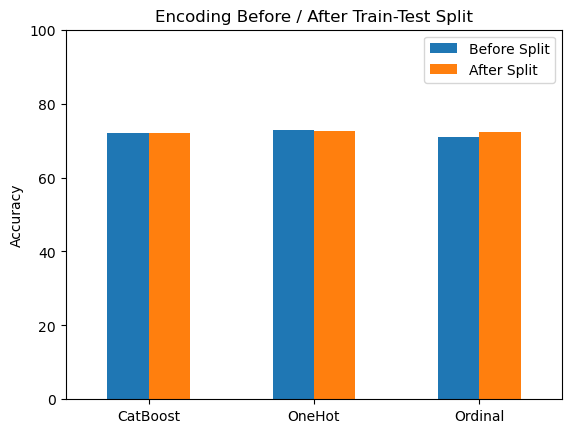

In [35]:
# Plot the information on Bar chart

before = [CB_Before_Average, OH_Before_Average, O_Before_Average]
after = [CB_AfterAverage, OH_After_Average, O_After_Average]
index = ['CatBoost', 'OneHot', 'Ordinal']
df = pd.DataFrame({'Before Split': before,
                    'After Split': after}, index=index)
ax = df.plot.bar(rot=0)
ax.set_ylim([0, 100])
ax.set_ylabel("Accuracy")
ax.set_title("Encoding Before / After Train-Test Split")

## Conclusion: 

#### Average Accuracy: 

The average accuracy for each of the tests returned as follows:

CatBoost Encoding - 
After:` 72.029%`
Before: `72.029%`

---------------------
OneHot Encoding - 
After: `72.659%`
Before: `72.799%`

---------------------
Ordinal Encoding - 
After: `72.301%`
Before: `70.91%`


#### CatBoost
Both implementations of `CatBoost` encoding returned the exact same values for each test that I ran on the dataset. After tracking ten different tests the average result received was `72.029%`. 
- From the results I received for my implementation of `CatBoost` encoding using `Categorical Naieve Bayes`, there is no change in accuracy when splitting the data before or after applying the encoding.

#### OneHot
Similar to the above reult outlined for `CatBoost`, the accuracy results were very similar for `OneHot` implemented with `Bernoulli Naive Bayes`.
- 8 out of 10 test results were identical, of the two that differed the accuracy for encoding the dataset before splitting between test and train returned marginally greater, at `0.14%` more when compared.
- This marginal difference is not sufficient to say what approach is more suited to  `OneHot` encoding. More testing  would need to be completed.

#### Ordinal Encoding 
An improvement in accuracy occured when encoding after splitting the sets while testing my implementation of `OrdinalEncoder` along with `Categorical Naive bayes`.

   - This suggests that splitting the data first is a more accurate method when implementing the `OrdinalEncoder` , to prove this hypothesis a larger scale of tests would be required.
   - After: `72.301%` Before: `70.91%`

#### Overall

My implementations of the encoders achieved similar levels of accuracy for predicting the `Class` target on the `breast-cancer.csv` dataset. Overall, `OneHot` encoding paired with `Bernoulli Naive Bayes`  provided the highest accuracy on average.


--------------------------------------

##### Reference - 

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

Available at:`https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html`
